In [1]:
import os
import json
import matplotlib.pyplot as plt

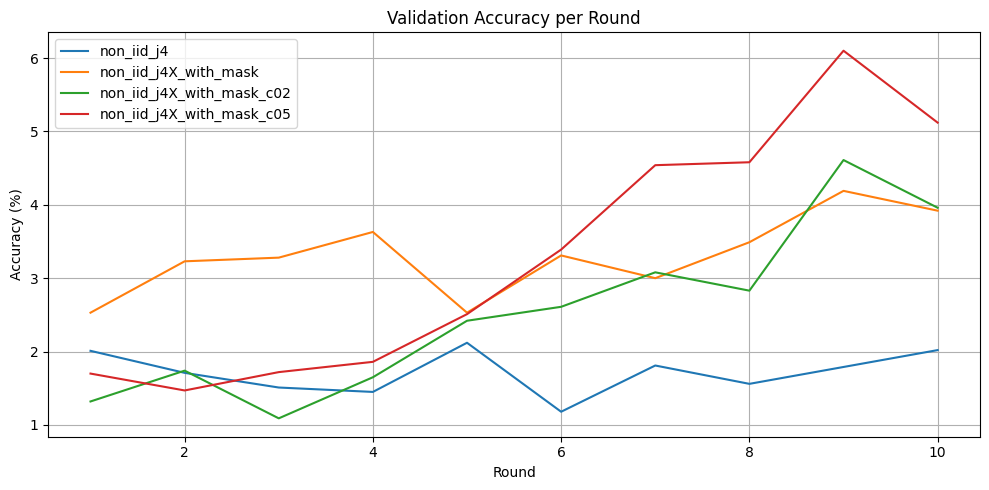

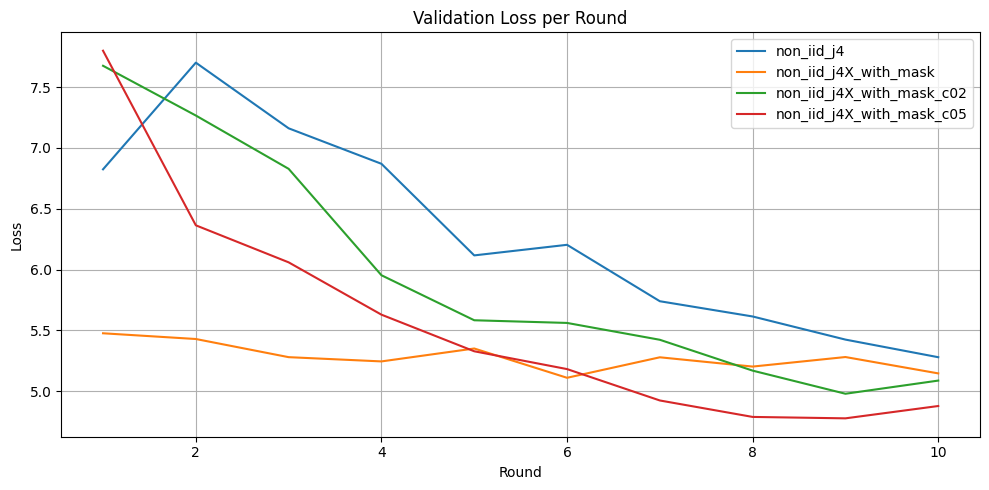


=== Final Test Results ===
non_iid_j4: Test Accuracy = 2.07%, Test Loss = 5.2541
non_iid_j4X_with_mask: Test Accuracy = 3.98%, Test Loss = 5.1401
non_iid_j4X_with_mask_c02: Test Accuracy = 4.18%, Test Loss = 5.0902
non_iid_j4X_with_mask_c05: Test Accuracy = 5.12%, Test Loss = 4.8933


In [5]:

# === Customize this list to match your actual result folders ===
folders = ["results_j4", "results_j4X_with_mask", "results_j4X_with_mask_c02","results_j4X_with_mask_c05"]

# === Collect all validation accuracies and losses ===
val_accuracies_all = {}
val_losses_all = {}
test_accuracies_all = {}
test_losses_all = {}

for folder in folders:
    if folder == "results_j4":
        label = "non_iid_j4"
    elif folder == "results_j4X_with_mask":
        label = "non_iid_j4X_with_mask"
    elif folder == "results_j4X_with_mask_c02":
        label = "non_iid_j4X_with_mask_c02"  
    elif folder == "results_j4X_with_mask_c05":
        label = "non_iid_j4X_with_mask_c05"  
    else:
        label = folder
    try:
        with open(os.path.join(folder, f"val_accuracy_{label}.json")) as f:
            val_accuracies_all[label] = json.load(f)
        with open(os.path.join(folder, f"val_loss_{label}.json")) as f:
            val_losses_all[label] = json.load(f)
        with open(os.path.join(folder, f"final_test_accuracy_{label}.txt")) as f:
            test_accuracies_all[label] = float(f.read().strip())
        with open(os.path.join(folder, f"final_test_loss_{label}.txt")) as f:
            test_losses_all[label] = float(f.read().strip())
    except FileNotFoundError:
        print(f"⚠️ Missing files in folder: {folder}")

# === Plot: Validation Accuracy ===
plt.figure(figsize=(10, 5))
for label, accs in val_accuracies_all.items():
    plt.plot(range(1, len(accs)+1), accs, label=f"{label}")
plt.title("Validation Accuracy per Round")
plt.xlabel("Round")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot: Validation Loss ===
plt.figure(figsize=(10, 5))
for label, losses in val_losses_all.items():
    plt.plot(range(1, len(losses)+1), losses, label=f"{label}")
plt.title("Validation Loss per Round")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Print Final Test Results ===
print("\n=== Final Test Results ===")
for label in sorted(test_accuracies_all):
    acc = test_accuracies_all[label]
    loss = test_losses_all.get(label, None)
    print(f"{label}: Test Accuracy = {acc:.2f}%, Test Loss = {loss:.4f}" if loss is not None else f"{label}: Test Accuracy = {acc:.2f}%")

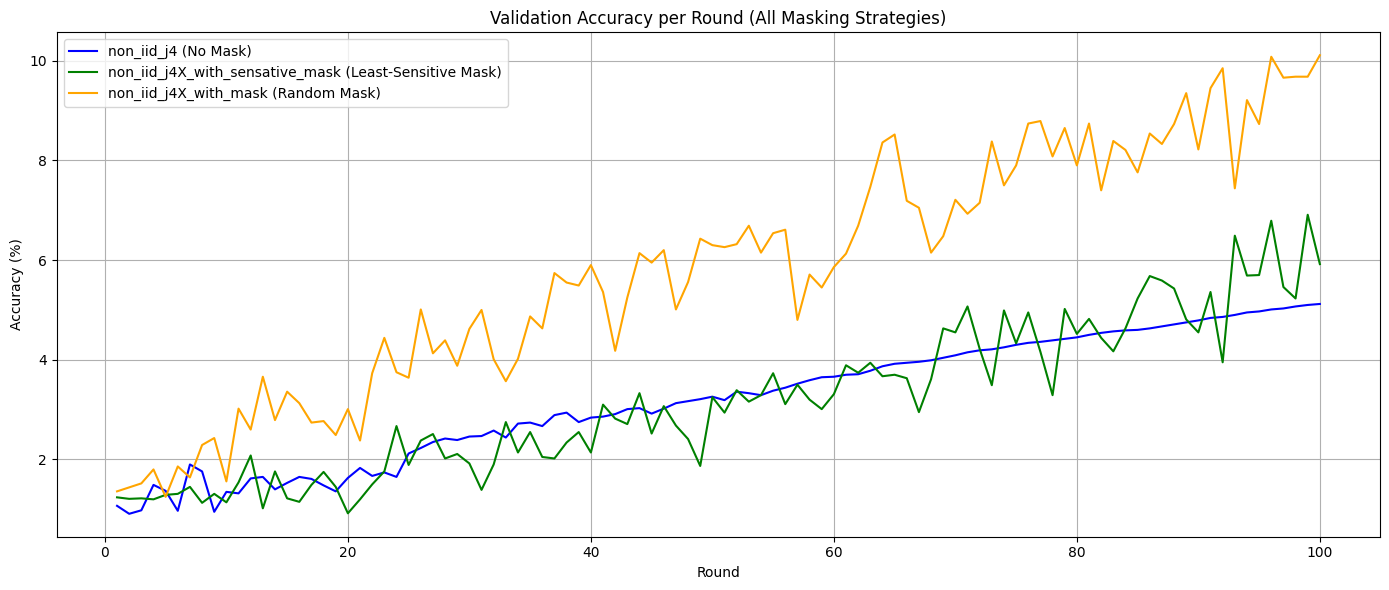

In [3]:
import os
import json
import matplotlib.pyplot as plt

# Accuracy data from the uploaded JSON (sensitive mask)
with open("./results_j4X_with_sensative_mask/val_accuracy_non_iid_j4X_with_sensative_mask.json", "r") as f:
    acc_sensitive_mask = json.load(f)

# Reuse previously defined accuracies for random mask and no mask
acc_random_mask = [
    1.36, 1.44, 1.52, 1.80, 1.25, 1.86, 1.64, 2.29, 2.43, 1.56,
    3.02, 2.60, 3.66, 2.79, 3.36, 3.13, 2.74, 2.77, 2.49, 3.01,
    2.38, 3.73, 4.44, 3.75, 3.64, 5.01, 4.13, 4.39, 3.88, 4.62,
    5.00, 4.01, 3.57, 4.02, 4.87, 4.63, 5.74, 5.55, 5.49, 5.90,
    5.36, 4.18, 5.25, 6.14, 5.95, 6.20, 5.01, 5.56, 6.43, 6.30,
    6.26, 6.32, 6.69, 6.15, 6.54, 6.61, 4.80, 5.71, 5.45, 5.86,
    6.13, 6.69, 7.47, 8.36, 8.52, 7.19, 7.05, 6.15, 6.48, 7.21,
    6.93, 7.15, 8.38, 7.50, 7.90, 8.74, 8.79, 8.08, 8.65, 7.90,
    8.74, 7.40, 8.39, 8.21, 7.76, 8.54, 8.33, 8.73, 9.35, 8.22,
    9.45, 9.85, 7.44, 9.21, 8.73, 10.08, 9.66, 9.68, 9.68, 10.11
]

acc_no_mask = [
    1.07, 0.91, 0.98, 1.49, 1.37, 0.97, 1.90, 1.76, 0.95, 1.35,
    1.32, 1.62, 1.65, 1.40, 1.53, 1.65, 1.61, 1.48, 1.36, 1.63,
    1.83, 1.67, 1.74, 1.65, 2.12, 2.23, 2.35, 2.42, 2.39, 2.46,
    2.47, 2.58, 2.44, 2.72, 2.74, 2.67, 2.89, 2.94, 2.75, 2.84,
    2.86, 2.91, 3.01, 3.03, 2.92, 3.02, 3.13, 3.17, 3.21, 3.26,
    3.19, 3.36, 3.33, 3.29, 3.38, 3.44, 3.52, 3.59, 3.65, 3.66,
    3.70, 3.71, 3.78, 3.87, 3.92, 3.94, 3.96, 3.99, 4.04, 4.09,
    4.15, 4.19, 4.21, 4.25, 4.30, 4.34, 4.36, 4.39, 4.42, 4.45,
    4.50, 4.54, 4.57, 4.59, 4.60, 4.63, 4.67, 4.71, 4.75, 4.79,
    4.84, 4.86, 4.90, 4.95, 4.97, 5.01, 5.03, 5.07, 5.10, 5.12
]

# Plot all three curves
plt.figure(figsize=(14, 6))
rounds = range(1, 101)

plt.plot(rounds, acc_no_mask, label='non_iid_j4 (No Mask)', color='blue')
plt.plot(rounds, acc_sensitive_mask, label='non_iid_j4X_with_sensative_mask (Least-Sensitive Mask)', color='green')
plt.plot(rounds, acc_random_mask, label='non_iid_j4X_with_mask (Random Mask)', color='orange')

plt.title("Validation Accuracy per Round (All Masking Strategies)")
plt.xlabel("Round")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


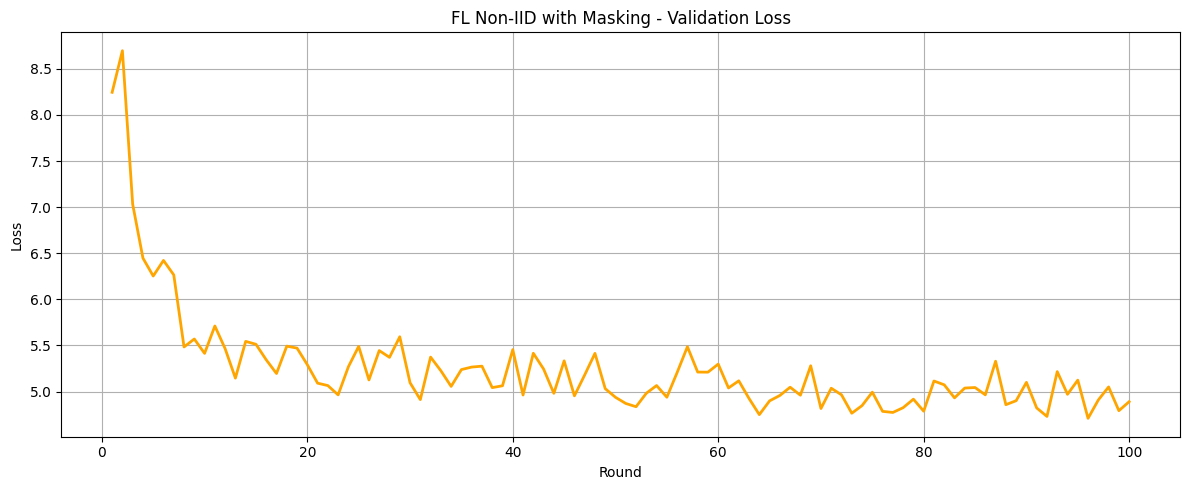

In [8]:
import matplotlib.pyplot as plt
loss = [8.2452, 8.6962, 7.0318, 6.4473, 6.2532, 6.4222, 6.2651, 5.4840, 5.5704, 5.4144, 5.7114, 5.4654, 5.1461, 5.5446, 5.5129, 5.3446, 5.1962, 5.4929, 5.4715, 5.2917, 5.0915, 5.0652, 4.9645, 5.2696, 5.4902, 5.1265, 5.4447, 5.3715, 5.5943, 5.0962, 4.9131, 5.3740, 5.2262, 5.0565, 5.2386, 5.2659, 5.2757, 5.0431, 5.0632, 5.4550, 4.9630, 5.4157, 5.2447, 4.9811, 5.3333, 4.9540, 5.1804, 5.4145, 5.0319, 4.9381, 4.8713, 4.8360, 4.9820, 5.0657, 4.9390, 5.2071, 5.4864, 5.2117, 5.2108, 5.2979, 5.0394, 5.1168, 4.9250, 4.7503, 4.8995, 4.9581, 5.0473, 4.9610, 5.2799, 4.8164, 5.0364, 4.9650, 4.7655, 4.8482, 4.9936, 4.7857, 4.7738, 4.8255, 4.9178, 4.7876, 5.1149, 5.0734, 4.9321, 5.0384, 5.0441, 4.9648, 5.3291, 4.8581, 4.9013, 5.1002, 4.8226, 4.7309, 5.2164, 4.9706, 5.1241, 4.7100, 4.9092, 5.0504, 4.7930, 4.8903]
plt.figure(figsize=(12,5))
plt.plot(range(1, 101), loss, linewidth=2, color='orange')
plt.title("FL Non-IID with Masking - Validation Loss")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()
